In [ ]:
# in case of
!rm -f probabilities* 
!ls

# Loading files from github rawlink to colab virtual server disk

!wget "https://raw.githubusercontent.com/promanas/HDATA/main/probabilities15_10000.txt"
!wget "https://raw.githubusercontent.com/promanas/HDATA/main/probabilitiesN13.txt"
!wget "https://raw.githubusercontent.com/promanas/HDATA/main/probabilitiesN14.txt"
!wget "https://raw.githubusercontent.com/promanas/HDATA/main/probabilitiesN15.txt"
!wget "https://raw.githubusercontent.com/promanas/HDATA/main/probabilitiesN16.txt"
!wget "https://raw.githubusercontent.com/promanas/HDATA/main/probabilitiesN17.txt"
!wget "https://raw.githubusercontent.com/promanas/HDATA/main/probabilitiesN18.txt"
!wget "https://raw.githubusercontent.com/promanas/HDATA/main/probabilitiesN19.txt"
!ls

sample_data
--2022-09-25 23:24:06--  https://raw.githubusercontent.com/promanas/HDATA/main/probabilities15_10000.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48100 (47K) [text/plain]
Saving to: ‘probabilities15_10000.txt’

probabilities15_100 100%[===================>]  46.97K  --.-KB/s    in 0.02s   

2022-09-25 23:24:07 (1.85 MB/s) - ‘probabilities15_10000.txt’ saved [48100/48100]

--2022-09-25 23:24:07--  https://raw.githubusercontent.com/promanas/HDATA/main/probabilitiesN13.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# loading data
prob15_10000 = np.loadtxt("probabilities15_10000.txt")
prob13 = np.loadtxt("probabilitiesN13.txt")
prob14 = np.loadtxt("probabilitiesN14.txt")
prob15 = np.loadtxt("probabilitiesN15.txt")
prob16 = np.loadtxt("probabilitiesN16.txt")
prob17 = np.loadtxt("probabilitiesN17.txt")
prob18 = np.loadtxt("probabilitiesN18.txt")
prob19 = np.loadtxt("probabilitiesN19.txt")

In [ ]:
print("size: ", np.size(prob15_10000))
print("max: ", np.max(prob15_10000))
print("min: ", np.min(prob15_10000))
print("std: ", np.std(prob15_10000))


size:  10000
max:  0.54
min:  0.12
std:  0.06271127410601701


Text(0.5, 1.0, 'prob15_10000')

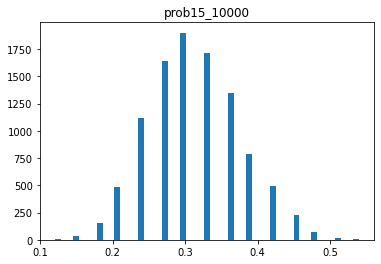

In [ ]:
plt.hist(prob15_10000,bins="auto")
plt.title("prob15_10000")



(array([  1.,   0.,   7.,   0.,   0.,  83.,   0., 149.,   0.,   0., 239.,
          0., 214.,   0.,   0., 197.,   0.,  89.,   0.,  21.]),
 array([0.12 , 0.132, 0.144, 0.156, 0.168, 0.18 , 0.192, 0.204, 0.216,
        0.228, 0.24 , 0.252, 0.264, 0.276, 0.288, 0.3  , 0.312, 0.324,
        0.336, 0.348, 0.36 ]),
 <a list of 20 Patch objects>)

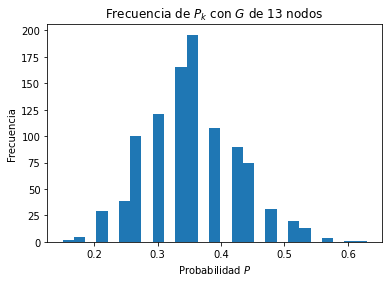

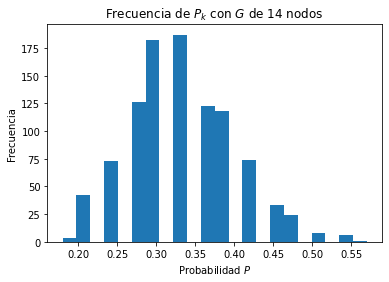

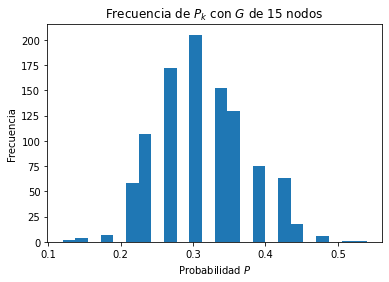

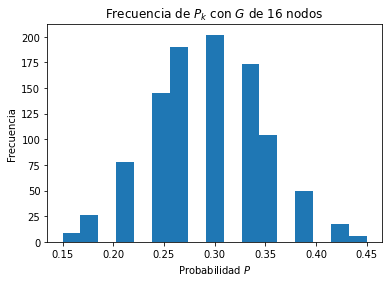

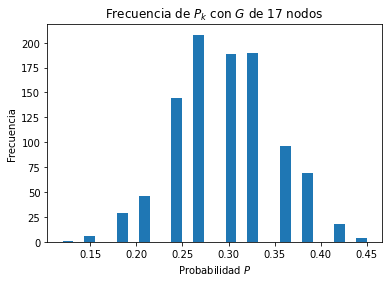

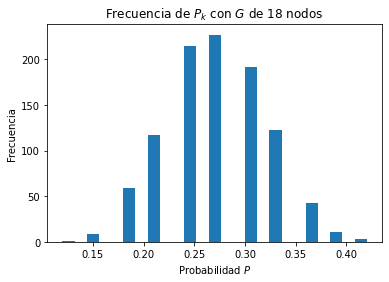

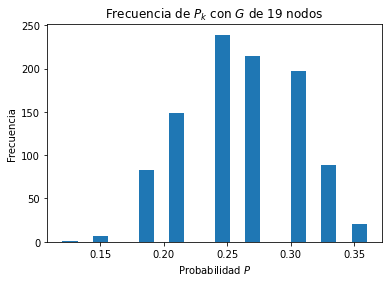

In [ ]:
plt.subplots(1)
plt.title("Frecuencia de $P_k$ con $G$ de 13 nodos")
plt.xlabel("Probabilidad $P$")
plt.ylabel("Frecuencia")
plt.hist(prob13,bins="auto")
plt.subplots(1)
plt.title("Frecuencia de $P_k$ con $G$ de 14 nodos")
plt.xlabel("Probabilidad $P$")
plt.ylabel("Frecuencia")
plt.hist(prob14,bins="auto")
plt.subplots(1)
plt.title("Frecuencia de $P_k$ con $G$ de 15 nodos")
plt.xlabel("Probabilidad $P$")
plt.ylabel("Frecuencia")
plt.hist(prob15,bins="auto")
plt.subplots(1)
plt.title("Frecuencia de $P_k$ con $G$ de 16 nodos")
plt.xlabel("Probabilidad $P$")
plt.ylabel("Frecuencia")
plt.hist(prob16,bins="auto")
plt.subplots(1)
plt.title("Frecuencia de $P_k$ con $G$ de 17 nodos")
plt.xlabel("Probabilidad $P$")
plt.ylabel("Frecuencia")
plt.hist(prob17,bins="auto")
plt.subplots(1)
plt.title("Frecuencia de $P_k$ con $G$ de 18 nodos")
plt.xlabel("Probabilidad $P$")
plt.ylabel("Frecuencia")
plt.hist(prob18,bins="auto")
plt.subplots(1)
plt.title("Frecuencia de $P_k$ con $G$ de 19 nodos")
plt.xlabel("Probabilidad $P$")
plt.ylabel("Frecuencia")
plt.hist(prob19,bins="auto")


# Fitting data to statistical model

In [ ]:
import pymc as pm
import aesara.tensor as at
import arviz as az

In [ ]:
data_15_10000 =np.array((prob15_10000-np.min(prob15_10000))/0.03,dtype=np.int64)
range15_10000=np.unique(data_15_10000)
range15_10000



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# the model is a binomial where parameter p is uniform and n is 14 
# data should be transformed to binomial domain: integer from 0 to n
with pm.Model() as model15_10000:
  P = pm.Uniform(name="P", lower=at.as_tensor_variable(0.0), upper=at.as_tensor_variable(1.0))
  Distrib = pm.Binomial(name="Distrib", p=P ,n=14 , observed=data_15_10000)


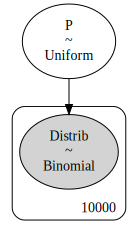

In [ ]:
pm.model_to_graphviz(model15_10000)

In [ ]:
with model15_10000:
  trace = pm.sample(draws=10000, tune=1000)

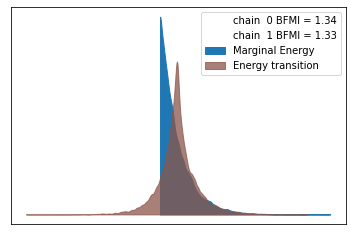

In [ ]:
az.plot_energy(trace)

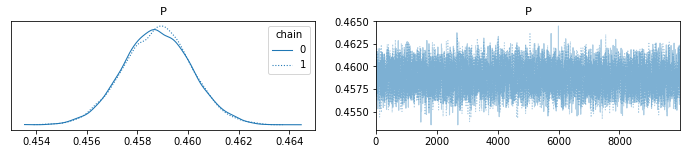

In [ ]:
with model15_10000:
  az.plot_trace(trace, legend=True)

In [ ]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [ ]:
P_S=trace.posterior['P']
t=np.array(P_S)
print("Average P: ", np.average(t))
print("Standar deviation P: ", np.std(t))
confidence=100.0*np.sum(np.logical_and(t>=0.454,t<=0.464)+0)/t.size
print("Percentage of values between 0.454 and 0.464: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Average P:  0.45877430555516385
Standar deviation P:  0.0013375438621210235
Percentage of values between 0.454 and 0.464:  99.975
Percentage Values outside this interval:  0.025000000000005684


In [ ]:
confidence=100.0*np.sum(np.logical_and(t>=0.457,t<=0.459)+0)/t.size
print("Percentage of values between 0.457 and 0.459: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Percentage of values between 0.457 and 0.459:  47.31
Percentage Values outside this interval:  52.69


In [ ]:
# A binomial(p,n) has: average n*p and variance n*p*(1-p)
# number need to be changed to probability scale
print("Critical probability: ", 14*0.45877786125773945, "->", 0.03*14*0.45877786125773945+np.min(prob15_10000))
print("Sigma arround critical probability: ", 0.03*np.sqrt(14*0.45877786125773945*(1-0.45877786125773945)))

Critical probability:  6.4228900576083525 -> 0.3126867017282505
Sigma arround critical probability:  0.055933793582204606


#data 13

In [ ]:
data_13 =np.array((prob13-0.15)/0.03,dtype=np.int64)
range13=np.unique(data_13)
print(range13)
len(range13)
# notice n=11 and n=15 missing

[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 16]


15

In [ ]:
# the model is a binomial where parameter p is uniform and n is 14 
# data should be transformed to binomial domain: integer from 0 to n
with pm.Model() as model13:
  P = pm.Uniform(name="P", lower=at.as_tensor_variable(0.0), upper=at.as_tensor_variable(1.0))
  Distrib = pm.Binomial(name="Distrib", p=P ,n=np.max(range13) , observed=data_13)


In [ ]:
with model13:
  trace = pm.sample(draws=10000, tune=1000)

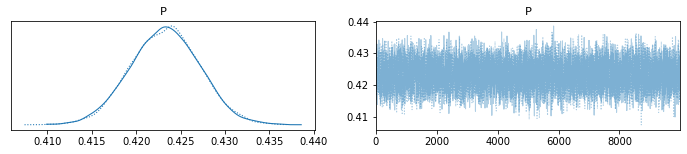

In [ ]:
with model15_10000:
  pm.plot_trace(trace)

In [ ]:
P_S=trace.posterior['P']
t=np.array(P_S)
print("Average P: ", np.average(t))
print("Standar deviation P: ", np.std(t))
confidence=100.0*np.sum(np.logical_and(t>=0.410,t<=0.435)+0)/t.size
print("Percentage of values between 0.410 and 0.435: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Average P:  0.42326199589159585
Standar deviation P:  0.0038930895816034084
Percentage of values between 0.410 and 0.435:  99.82
Percentage Values outside this interval:  0.18000000000000682


In [ ]:
import numpy as np
np.log(13)/13

0.1973037967278105

In [ ]:
# A binomial(p,n) has: average n*p and variance n*p*(1-p)
# number need to be changed to probability scale
print("Critical probability: ", np.max(range13)*0.4233233501255987, "->", 0.03*np.max(range13)*0.45877786125773945+np.min(prob13))
print("Sigma arround critical probability: ", 0.03*np.sqrt(np.max(range13)*0.4233233501255987*(1-0.4233233501255987)))

Critical probability:  6.773173602009579 -> 0.37021337340371496
Sigma arround critical probability:  0.05929028550818552


# Data 14

In [ ]:
data_14 =np.array((prob14-np.min(prob14))/0.03,dtype=np.int64)
range14=np.unique(data_14)
print(range14)
len(range14)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


13

In [ ]:
# the model is a binomial where parameter p is uniform and n is 12 
# data should be transformed to binomial domain: integer from 0 to n
with pm.Model() as model14:
  P = pm.Uniform(name="P", lower=at.as_tensor_variable(0.0), upper=at.as_tensor_variable(1.0))
  Distrib = pm.Binomial(name="Distrib", p=P ,n=np.max(range14) , observed=data_14)

In [ ]:
with model14:
  trace = pm.sample(draws=10000, tune=1000)

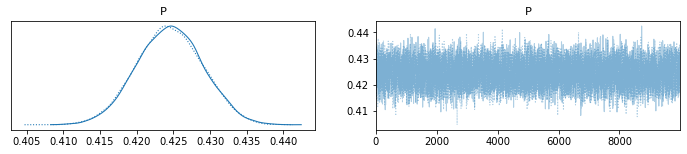

In [ ]:
with model14:
  pm.plot_trace(trace)

In [ ]:
P_S=trace.posterior['P']
t=np.array(P_S)
print("Average P: ", np.average(t))
print("Standar deviation P: ", np.std(t))
confidence=100.0*np.sum(np.logical_and(t>=0.410,t<=0.435)+0)/t.size
print("Percentage of values between 0.410 and 0.435: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Average P:  0.42452728677219737
Standar deviation P:  0.004496272452676571
Percentage of values between 0.410 and 0.435:  99.06
Percentage Values outside this interval:  0.9399999999999977


# Data 15

In [ ]:
data_15 =np.array((prob15-np.min(prob15))/0.03,dtype=np.int64)
range15=np.unique(data_15)
print(range15)
len(range15)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


15

In [ ]:
# the model is a binomial where parameter p is uniform and n is 14 
# data should be transformed to binomial domain: integer from 0 to n
with pm.Model() as model15:
  P = pm.Uniform(name="P", lower=at.as_tensor_variable(0.0), upper=at.as_tensor_variable(1.0))
  Distrib = pm.Binomial(name="Distrib", p=P ,n=np.max(range15) , observed=data_15)

In [ ]:
with model15:
  trace = pm.sample(draws=10000, tune=1000)

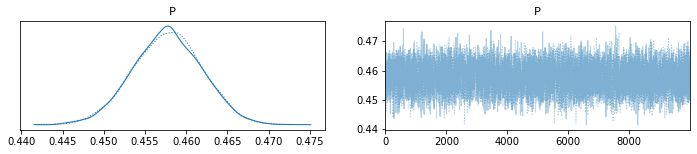

In [ ]:
with model15_10000:
  pm.plot_trace(trace)

In [ ]:
P_S=trace.posterior['P']
t=np.array(P_S)
print("Average P: ", np.average(t))
print("Standar deviation P: ", np.std(t))
confidence=100.0*np.sum(np.logical_and(t>=0.445,t<=0.470)+0)/t.size
print("Percentage of values between 0.410 and 0.435: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Average P:  0.45774204780075106
Standar deviation P:  0.004211614315378695
Percentage of values between 0.410 and 0.435:  99.71
Percentage Values outside this interval:  0.29000000000000625


# Data 16

In [ ]:
data_16 =np.array((prob16-np.min(prob16))/0.03,dtype=np.int64)
range16=np.unique(data_16)
print(range16)
len(range16)

[ 0  1  2  3  4  5  6  7  8  9 10]


11

In [ ]:
# the model is a binomial where parameter p is uniform and n is 10
# data should be transformed to binomial domain: integer from 0 to n
with pm.Model() as model16:
  P = pm.Uniform(name="P", lower=at.as_tensor_variable(0.0), upper=at.as_tensor_variable(1.0))
  Distrib = pm.Binomial(name="Distrib", p=P ,n=np.max(range16) , observed=data_16)

In [ ]:
with model16:
  trace = pm.sample(draws=10000, tune=1000)

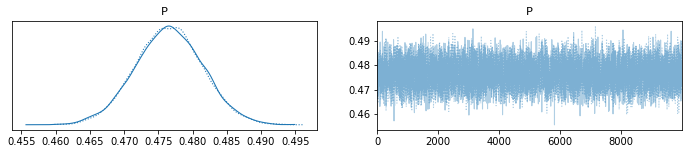

In [ ]:
with model15_10000:
  pm.plot_trace(trace)

In [ ]:
P_S=trace.posterior['P']
t=np.array(P_S)
print("Average P: ", np.average(t))
print("Standar deviation P: ", np.std(t))
confidence=100.0*np.sum(np.logical_and(t>=0.460,t<=0.490)+0)/t.size
print("Percentage of values between 0.410 and 0.435: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Average P:  0.4765446058751333
Standar deviation P:  0.004925931727540558
Percentage of values between 0.410 and 0.435:  99.625
Percentage Values outside this interval:  0.375


# Data 17

In [ ]:
data_17 =np.array((prob17-np.min(prob17))/0.03,dtype=np.int64)
range17=np.unique(data_17)
print(range17)
len(range17)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


12

In [ ]:
# the model is a binomial where parameter p is uniform and n is 11
# data should be transformed to binomial domain: integer from 0 to n
with pm.Model() as model17:
  P = pm.Uniform(name="P", lower=at.as_tensor_variable(0.0), upper=at.as_tensor_variable(1.0))
  Distrib = pm.Binomial(name="Distrib", p=P ,n=np.max(range17) , observed=data_17)

In [ ]:
with model17:
  trace = pm.sample(draws=10000, tune=1000)

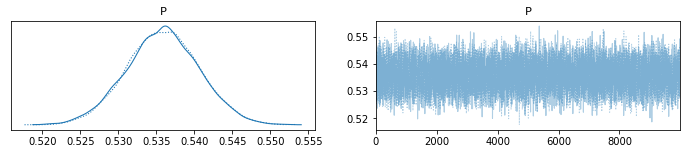

In [ ]:
with model15_10000:
  pm.plot_trace(trace)

In [ ]:
P_S=trace.posterior['P']
t=np.array(P_S)
print("Average P: ", np.average(t))
print("Standar deviation P: ", np.std(t))
confidence=100.0*np.sum(np.logical_and(t>=0.520,t<=0.550)+0)/t.size
print("Percentage of values between 0.410 and 0.435: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Average P:  0.5358617182537839
Standar deviation P:  0.0047754225692841845
Percentage of values between 0.410 and 0.435:  99.835
Percentage Values outside this interval:  0.16500000000000625


# Data 18

In [ ]:
data_18 =np.array((prob18-np.min(prob18))/0.03,dtype=np.int64)
range18=np.unique(data_18)
print(range18)
len(range18)

[ 0  1  2  3  4  5  6  7  8  9 10]


11

In [ ]:
# the model is a binomial where parameter p is uniform and n is 10
# data should be transformed to binomial domain: integer from 0 to n
with pm.Model() as model18:
  P = pm.Uniform(name="P", lower=at.as_tensor_variable(0.0), upper=at.as_tensor_variable(1.0))
  Distrib = pm.Binomial(name="Distrib", p=P ,n=np.max(range18) , observed=data_18)

In [ ]:
with model18:
  trace = pm.sample(draws=10000, tune=1000)

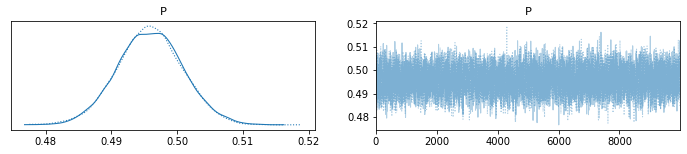

In [ ]:
with model15_10000:
  pm.plot_trace(trace)

In [ ]:
P_S=trace.posterior['P']
t=np.array(P_S)
print("Average P: ", np.average(t))
print("Standar deviation P: ", np.std(t))
confidence=100.0*np.sum(np.logical_and(t>=0.480,t<=0.510)+0)/t.size
print("Percentage of values between 0.410 and 0.435: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Average P:  0.49585899183178817
Standar deviation P:  0.0049671139088031755
Percentage of values between 0.410 and 0.435:  99.685
Percentage Values outside this interval:  0.3149999999999977


# Data 19

In [ ]:
data_19 =np.array((prob19-np.min(prob19))/0.03,dtype=np.int64)
range19=np.unique(data_19)
print(range19)
len(range19)

[0 1 2 3 4 5 6 7 8]


9

In [ ]:
# the model is a binomial where parameter p is uniform and n is 8
# data should be transformed to binomial domain: integer from 0 to n
with pm.Model() as model19:
  P = pm.Uniform(name="P", lower=at.as_tensor_variable(0.0), upper=at.as_tensor_variable(1.0))
  Distrib = pm.Binomial(name="Distrib", p=P ,n=np.max(range19) , observed=data_19)

In [ ]:
with model19:
  trace = pm.sample(draws=10000, tune=1000)

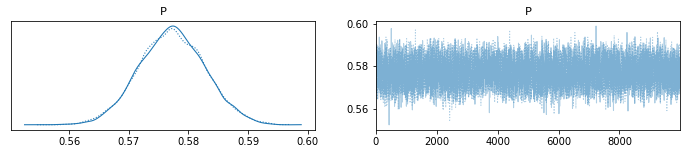

In [ ]:
with model15_10000:
  pm.plot_trace(trace)

In [ ]:
P_S=trace.posterior['P']
t=np.array(P_S)
print("Average P: ", np.average(t))
print("Standar deviation P: ", np.std(t))
confidence=100.0*np.sum(np.logical_and(t>=0.560,t<=0.590)+0)/t.size
print("Percentage of values between 0.410 and 0.435: ",confidence)
print("Percentage Values outside this interval: ", 100-confidence)

Average P:  0.5772449398929469
Standar deviation P:  0.005532891642500347
Percentage of values between 0.410 and 0.435:  98.855
Percentage Values outside this interval:  1.144999999999996
